In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Loading the data
PATH = os.getcwd()
PATH = os.path.join(PATH,'cell_images')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH,'validation')


In [12]:
train_p_dir = os.path.join(train_dir, 'Parasitized')  # directory with our training cat pictures
train_n_dir = os.path.join(train_dir, 'Uninfected')  # directory with our training dog pictures
validation_p_dir = os.path.join(validation_dir, 'Parasitized')  # directory with our validation cat pictures
validation_n_dir = os.path.join(validation_dir, 'Uninfected')  # directory with our validation dog pictures


In [13]:
num_p_tr = len(os.listdir(train_p_dir))
num_n_tr = len(os.listdir(train_n_dir))

num_p_val = len(os.listdir(validation_p_dir))
num_n_val = len(os.listdir(validation_n_dir))

total_train = num_p_tr + num_n_tr
total_val = num_p_val + num_n_val


In [3]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [4]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 100
IMG_WIDTH = 100


In [5]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 23558 images belonging to 2 classes.


In [6]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


Found 2000 images belonging to 2 classes.


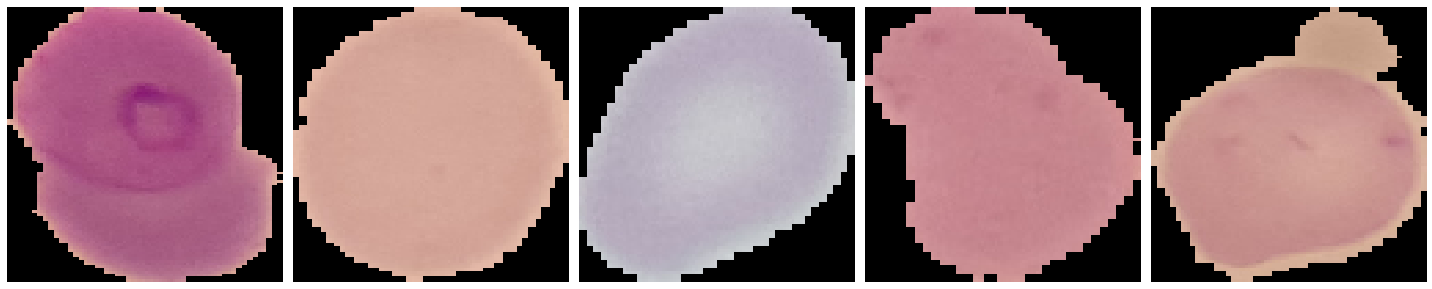

In [7]:
sample_training_images, _ = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])

In [8]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [10]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
__________

In [14]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Instructions for updating:
Use tf.cast instead.
Epoch 1/15
185/185 [==============================] - 836s 5s/step - loss: 0.5468 - acc: 0.7102 - val_loss: 0.1884 - val_acc: 0.9355
Epoch 2/15
185/185 [==============================] - 147s 794ms/step - loss: 0.1961 - acc: 0.9300 - val_loss: 0.1362 - val_acc: 0.9625
Epoch 3/15
185/185 [==============================] - 142s 769ms/step - loss: 0.1546 - acc: 0.9477 - val_loss: 0.0968 - val_acc: 0.9715
Epoch 4/15
185/185 [==============================] - 235s 1s/step - loss: 0.1413 - acc: 0.9542 - val_loss: 0.0986 - val_acc: 0.9715
Epoch 5/15
185/185 [==============================] - 85s 459ms/step - loss: 0.1278 - acc: 0.9570 - val_loss: 0.0936 - val_acc: 0.9720
Epoch 6/15
185/185 [==============================] - 88s 477ms/step - loss: 0.1122 - acc: 0.9610 - val_loss: 0.1047 - val_acc: 0.9720
Epoch 7/15
185/185 [==============================] - 89s 480ms/step - loss: 0.0965 - acc: 0.9657 - val_loss: 0.0965 - val_acc: 0.9735
Epoch 8/1

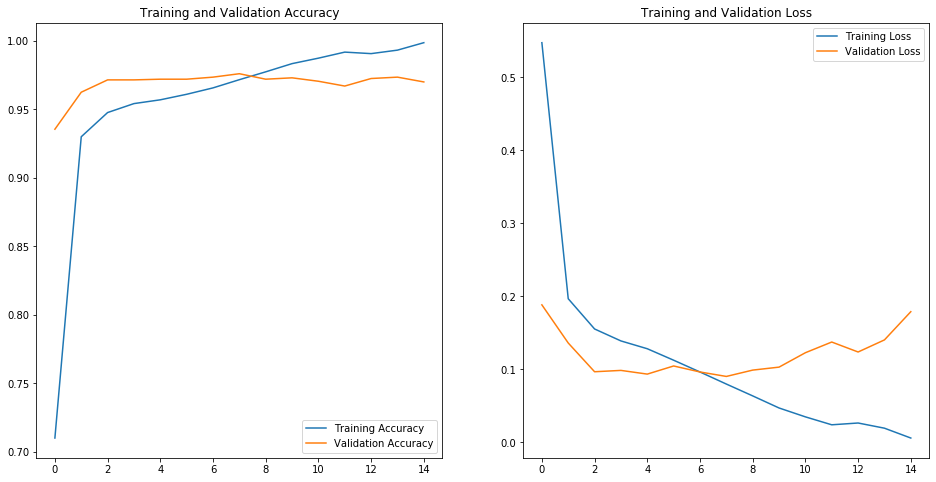

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [17]:
model.save('keras_cnn.h5')

In [58]:
from keras.models import load_model
model = tf.keras.models.load_model('./keras_cnn.h5')
model_arch = model.to_json()
with open("arch.json", "w") as json_file:
      json_file.write(model_arch)
model_weights = model.save_weights('weights.h5')

In [60]:
json_file.close()

# inference

In [47]:
test_dir = os.path.join(PATH,'test')
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [27]:
output = model.predict_generator(test_data_gen, steps=2000//batch_size)

In [28]:
output

array([[9.9835658e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       ...,
       [1.7881393e-07],
       [9.9910337e-01],
       [9.9998862e-01]], dtype=float32)

In [48]:
sample_test_images, labels = next(test_data_gen)


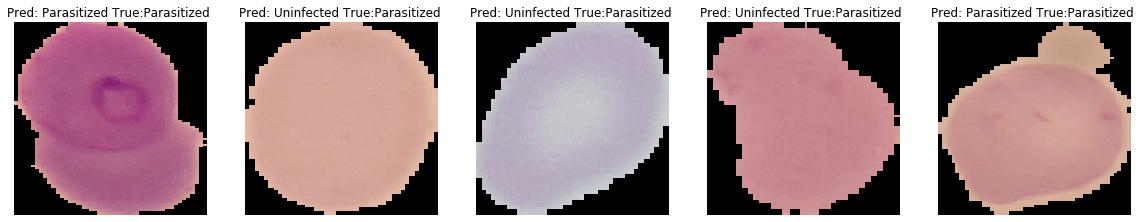

In [49]:
rows=1
columns=5
fig = plt.figure(figsize=(20, 20))

images_arr = sample_training_images[:5]
i=0
for m in range(1, columns*rows +1):
    #img = images[m-1].reshape([IMG_SIZE_ALEXNET, IMG_SIZE_ALEXNET, 3])
    img = images_arr[i]
    fig.add_subplot(rows, columns, m)
    plt.imshow(img)
    if output[i]>0.9:
        pred='Parasitized '
    else:
        pred='Uninfected '
    if labels[i]==1.0:
        true='Parasitized '
    else:
        true='Uninfected '
    plt.title("Pred: " + pred + 'True:'+true)
    plt.axis('off')
    i+=1
plt.show()

In [43]:
labels[124]

0.0

## Convert keras model into Tensorflow

In [2]:
from keras.models import model_from_json
from keras.models import load_model
from keras import backend as K
import tensorflow as tf


model_file = "arch.json"
weights_file = "weights.h5"

with open(model_file, "r") as file:
    config = file.read()

K.set_learning_phase(0)
model = tf.keras.models.model_from_json(config)
model.load_weights(weights_file)



In [4]:
#K.set_learning_phase(0)
#model = tf.keras.models.load_model('keras_cnn.h5')

saver = tf.train.Saver()

In [5]:
sess = tf.Session()
sess = K.get_session()

In [9]:
sess.run(tf.global_variables_initializer())
saver.save(sess, "my_model")

'my_model'

In [10]:
fw = tf.summary.FileWriter('logs', sess.graph)
fw.close()

In [11]:
sess.graph.get_operations()

[<tf.Operation 'conv2d_input' type=Placeholder>,
 <tf.Operation 'conv2d/kernel/Initializer/random_uniform/shape' type=Const>,
 <tf.Operation 'conv2d/kernel/Initializer/random_uniform/min' type=Const>,
 <tf.Operation 'conv2d/kernel/Initializer/random_uniform/max' type=Const>,
 <tf.Operation 'conv2d/kernel/Initializer/random_uniform/RandomUniform' type=RandomUniform>,
 <tf.Operation 'conv2d/kernel/Initializer/random_uniform/sub' type=Sub>,
 <tf.Operation 'conv2d/kernel/Initializer/random_uniform/mul' type=Mul>,
 <tf.Operation 'conv2d/kernel/Initializer/random_uniform' type=Add>,
 <tf.Operation 'conv2d/kernel' type=VarHandleOp>,
 <tf.Operation 'conv2d/kernel/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'conv2d/kernel/Assign' type=AssignVariableOp>,
 <tf.Operation 'conv2d/kernel/Read/ReadVariableOp' type=ReadVariableOp>,
 <tf.Operation 'conv2d/bias/Initializer/zeros' type=Const>,
 <tf.Operation 'conv2d/bias' type=VarHandleOp>,
 <tf.Operation 'conv2d/bias/IsIni